In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stat

In [2]:
data = pd.read_csv('Sales_add.csv')
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [3]:
sales_before = data['Sales_before_digital_add(in $)']
sales_after = data['Sales_After_digital_add(in $)']
sales_data = [sales_before,sales_after]

In [4]:
data.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


<ipython-input-5-419be4921f9f>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Before', 'After'])


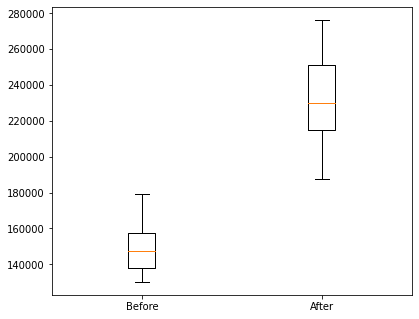

In [5]:
fig = plt.figure(figsize =(5, 4))

ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(['Before', 'After'])

bp = ax.boxplot(sales_data)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

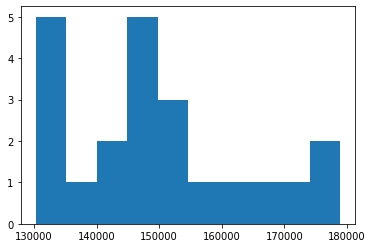

In [6]:
plt.hist(sales_before)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

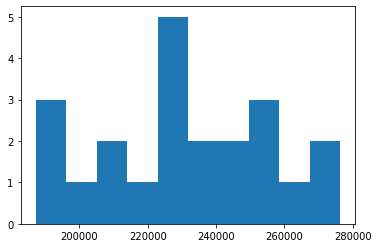

In [7]:
plt.hist(sales_after)
plt.show

#### H0: Sales have a growth after digital ads
#### Ha: Sales do not have growth after digital ads

In [8]:
t, p = stat.ttest_rel(sales_before, sales_after, alternative='greater')

print(f'The T value is {t} and P value is {p}')

The T value is -12.09070525287017 and P value is 0.9999999999683167


Since the p value is greater than significance level of 0.05, we accept the null hypothesis

There is growth in sales after digital adds

In [36]:
before_mean = sales_before.mean()
after_mean = sales_after.mean()

print(f'The mean of sales before is {round(before_mean,2)} and mean of sales after the digital ads is {round(after_mean,2)}')

The mean of sales before is 149239.95 and mean of sales after the digital ads is 231123.73


In [9]:
mean_before = round(sales_before.mean(),2)
mean_after = round(sales_after.mean(),2)

print(f'The mean of sales before digital ads is {mean_before} and sales after the digital ads is {mean_after}')

The mean of sales before digital ads is 149239.95 and sales after the digital ads is 231123.73


#### H0: There is dependency with Region and Manager
#### Ha: There is no dependency with Regioin and Manager

In [21]:
region = data['Region'].replace({'Region - A':1,'Region - B':2,'Region - C':3})
manager = data['Manager'].replace({'Manager - A':1,'Manager - B':2,'Manager - C':3})
data_reg_mng = [region,manager]

signf = 0.05
statt, p, dof, expected = stat.chi2_contingency(data_reg_mng)
p

0.9975025723557724

The P-value is higher than significent level of 0.05, so we accept null hypothesis

The Region and Manager is dependent to each other